In [196]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [197]:
from os import listdir
from os.path import isfile
from skimage.transform import resize
from sklearn.metrics import classification_report, confusion_matrix

In [198]:
path = r'C:/Users/melis/OneDrive/Masaüstü/data_signature/'

In [199]:
folders = listdir(path)
folders

['150401043',
 '150401051',
 '160401014',
 '160401025',
 '160401045',
 '170401012',
 '170401016',
 '170401018',
 '170401025',
 '170401040',
 '170401043']

In [200]:
list_of_img = []
imglabels = {'150401043':'0', '150401051':'1', '160401014':'2', '160401025':'3', '160401045':'4', 
          '170401012':'5', '170401016':'6', '170401018':'7', '170401025':'8', '170401040':'9', 
          '170401043':'10'}
y = []
X_test = []
y_test = []

for folder in folders:
    
    print(folder)
    for i in range(1,32):
        imgpath = path + folder + '/' + folder + '_'
        if i<10:
            imgpath = imgpath + '0' + str(i) + '_cropped_.png'
        elif i>10 and i!=31:
            imgpath = imgpath + str(i) + '_cropped_.png'
        else:
            imgpath = imgpath + 'test_cropped_.png'

        img = plt.imread(imgpath)
        img = img[:,:,0]
        img = resize(img, (200,200))
        img = np.ndarray.flatten(img)
        
        if i==31:
            X_test.append(img)
            y_test.append(imglabels[folder])
        
        else:
            list_of_img.append(img)
            y.append(imglabels[folder])

150401043
150401051
160401014
160401025
160401045
170401012
170401016
170401018
170401025
170401040
170401043


In [201]:
len(list_of_img)

330

In [202]:
X = np.array(list_of_img)
y = np.array(y, dtype=object)

In [203]:
X_test = np.array(X_test)
y_test = np.array(y_test, dtype=object)

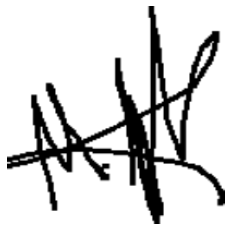

10


In [204]:
i = 329
plt.imshow(X[i].reshape(200,200), cmap ='gray')
plt.axis("off")
plt.show()
print(y[i])

In [205]:
(X.shape), (y.shape), (X_test.shape, y_test.shape)

((330, 40000), (330,), ((11, 40000), (11,)))

In [206]:
y

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6

In [207]:
X = X / 255

In [208]:
X_test = X_test / 255

In [209]:
digits = 11
examples = y.shape[0]

In [210]:
print(examples)

330


In [211]:
y = y.reshape(1, examples)

In [212]:
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [213]:
digits = 11
examples = y_test.shape[0]
y_test = y_test.reshape(1, examples)
Yt_new = np.eye(digits)[y_test.astype('int32')]
Yt_new = Yt_new.T.reshape(digits, examples)

In [214]:
(y.shape, Y_new.shape), (y_test.shape, Yt_new.shape)

(((1, 330), (11, 330)), ((1, 11), (11, 11)))

In [215]:
m = 330
m_test = X.shape[0] - m

X_train = X[:m].T
Y_train = Y_new[:,:m]
X_test = X_test.T
Y_test = Yt_new

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

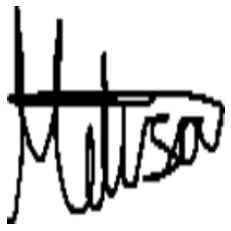

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [216]:
i = 12
plt.imshow(X_train[:,i].reshape(200,200), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [217]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [218]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [219]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  6.277855245086629
Epoch 100 cost:  2.147898898084187
Epoch 200 cost:  1.8356751105351894
Epoch 300 cost:  1.6067783184545719
Epoch 400 cost:  1.396049530327486
Epoch 500 cost:  1.2122760354692421
Epoch 600 cost:  1.0315426367097402
Epoch 700 cost:  0.8828899769285836
Epoch 800 cost:  0.7608017630269988
Epoch 900 cost:  0.676582004147091
Epoch 1000 cost:  0.6017800570645606
Epoch 1100 cost:  0.5425393798752746
Epoch 1200 cost:  0.4923067606341244
Epoch 1300 cost:  0.4491706468868509
Epoch 1400 cost:  0.4116611789691703
Epoch 1500 cost:  0.3785075169035964
Epoch 1600 cost:  0.3483266289847517
Epoch 1700 cost:  0.330852268285569
Epoch 1800 cost:  0.31345424011620204
Epoch 1900 cost:  0.29143335717339114
Final cost: 0.2676334471012131


In [221]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         1
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         1

    accuracy                           0.91        11
   macro avg       0

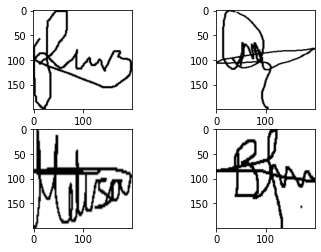

In [225]:
plt.subplot(2,2,1)
plt.imshow(X[:,91].reshape(200,200), cmap ='gray')
plt.subplot(2,2,2)
plt.imshow(X[:,160].reshape(200,200), cmap ='gray')
plt.subplot(2,2,3)
plt.imshow(X[:,310].reshape(200,200), cmap ='gray')
plt.subplot(2,2,4)
plt.imshow(X[:,312].reshape(200,200), cmap ='gray')
plt.show()

In [ ]:
## Data boyutunu 200x200 olarak aldım ve accuracy  0.91 gibi oldukça yüksek bir oran çıktı.